<a href="https://colab.research.google.com/github/Esmail97/ML-projects/blob/main/titanic_full_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import GradientBoostingClassifier  # For classification
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score ,accuracy_score # For classification
from sklearn.metrics import mean_squared_error # For regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

#Explore data

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
nul_data = train.isnull().sum()
nul_data[nul_data>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

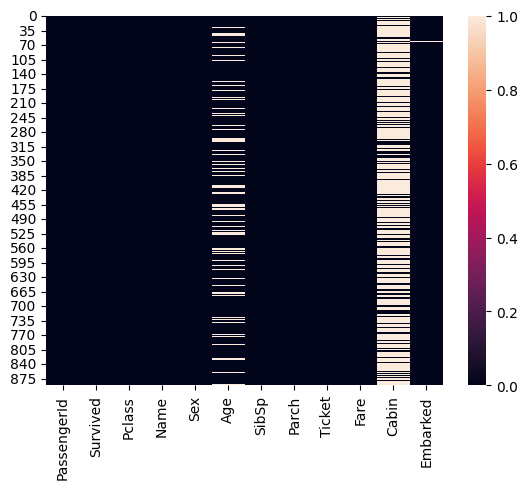

In [8]:
sns.heatmap(train.isnull())

##Clean data

In [9]:
#using a function to make all changes on both datasets(train and test)
def clean (x):
    x.drop(['Name','Fare','Ticket','Cabin','Embarked'],axis=1,inplace=True)
    x.Age = x.Age.fillna(x.Age.median())
    x.dropna()
    return x

In [10]:
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [11]:
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


<Axes: >

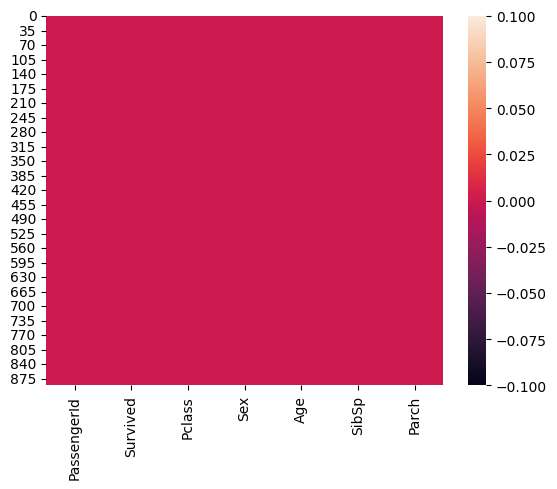

In [12]:
sns.heatmap(train.isnull())

##Analysis

<ipython-input-13-8942528a2e19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train.corr()


<Axes: >

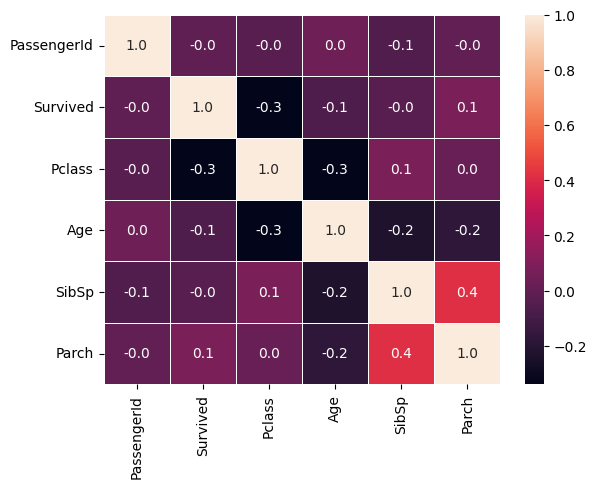

In [13]:
cor = train.corr()
sns.heatmap(cor , annot=True ,fmt = '0.1f' ,linewidths=0.5)

In [14]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: ylabel='Survived'>

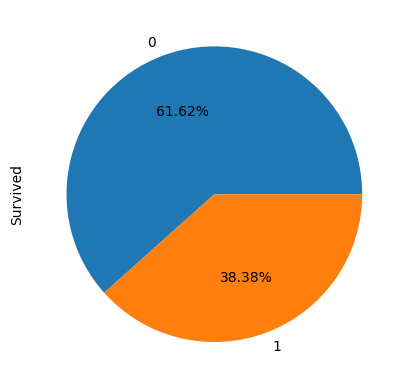

In [15]:
train.Survived.value_counts().plot.pie(autopct = '%0.2f%%')

<Axes: ylabel='Sex'>

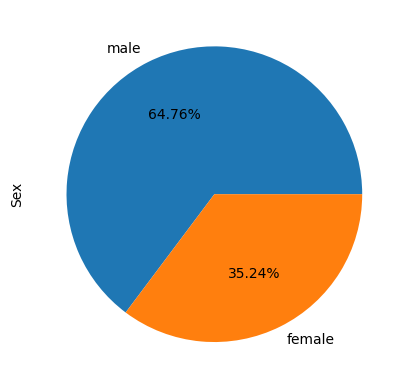

In [16]:
train.Sex.value_counts().plot.pie(autopct = '%0.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

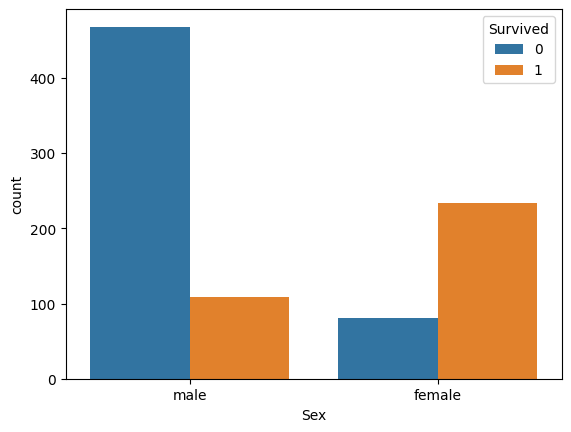

In [17]:
sns.countplot(train,x='Sex' ,hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

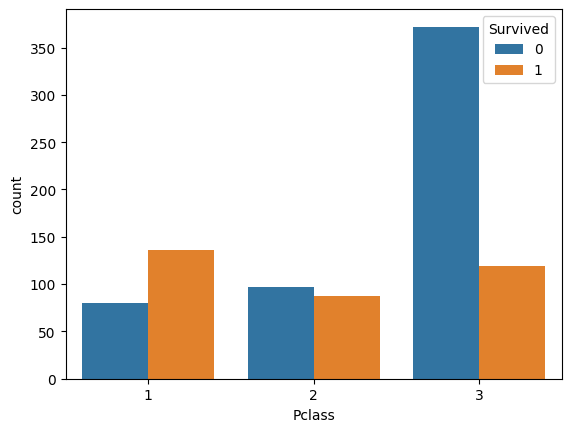

In [18]:
sns.countplot(train,x='Pclass',hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

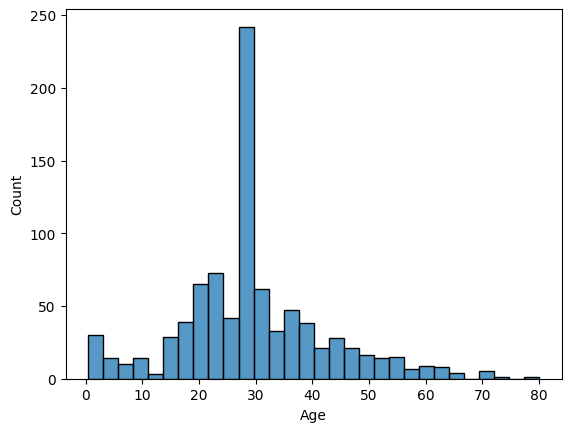

In [19]:
sns.histplot(train,x='Age')

#Transform object data to numeric data

In [20]:
train.Sex = pd.get_dummies(train.Sex,drop_first =True )
test.Sex = pd.get_dummies(test.Sex,drop_first =True )
train.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: uint8

##Machine Learning Models

In [21]:
#features selection
X = train.drop(['Survived'],axis = 1)
y = train['Survived']
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,1,22.0,1,0
1,2,1,0,38.0,1,0
2,3,3,0,26.0,0,0
3,4,1,0,35.0,1,0
4,5,3,1,35.0,0,0
...,...,...,...,...,...,...
886,887,2,1,27.0,0,0
887,888,1,0,19.0,0,0
888,889,3,0,28.0,1,2
889,890,1,1,26.0,0,0


In [22]:
#split data using train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [23]:
models = ['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier','GradientBoostingClassifier'
,'KNeighborsClassifier','GaussianNB','SVC']
accuracies = []

In [24]:
def select_model(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuarcy = accuracy_score(y_pred,y_test)
  print ('Accuracy Score: ',accuarcy)
  accuracies.append(accuarcy)

In [25]:
model_1 = DecisionTreeClassifier()
select_model(model_1)

Accuracy Score:  0.7541899441340782


In [26]:
model_2 = LogisticRegression()
select_model(model_2)

Accuracy Score:  0.7877094972067039


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
model_3 = RandomForestClassifier()
select_model(model_3)

Accuracy Score:  0.8100558659217877


In [28]:
model_4 = GradientBoostingClassifier()
select_model(model_4)

Accuracy Score:  0.8212290502793296


In [29]:
model_5 = KNeighborsClassifier(n_neighbors=5)
select_model(model_5)

Accuracy Score:  0.5139664804469274


In [30]:
model_6 = GaussianNB()
select_model(model_6)

Accuracy Score:  0.7597765363128491


In [31]:
model_7 = SVC()
select_model(model_7)

Accuracy Score:  0.5921787709497207


In [32]:
all_data =pd.DataFrame({'Model':models,'Accuracy':accuracies})
all_data

,Model,Accuracy
0,DecisionTreeClassifier,0.754190
1,LogisticRegression,0.787709
2,RandomForestClassifier,0.810056
3,GradientBoostingClassifier,0.821229
4,KNeighborsClassifier,0.513966
5,GaussianNB,0.759777
6,SVC,0.592179


In [34]:
best_model = GradientBoostingClassifier	()
best_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [35]:
ypred = best_model.predict(test)

In [36]:
last = test.PassengerId

In [37]:
new_dataframe = pd.DataFrame({'PassengerId':last,'Survived':ypred})

In [38]:
new_dataframe.to_csv('submission.csv',index = False)